## coil-20 latent space test

In [9]:
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from tqdm import tqdm
import clip
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
coil20 = list()
for i in range(20):
    coil20.append(list())
    for j in range(72):
        img = Image.open(f'../Data/coil-20/{i+1}/obj{i+1}__{j}.png')
        coil20[i-1].append(img)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

  5%|▌         | 1/20 [00:08<02:49,  8.92s/it]


KeyboardInterrupt: 

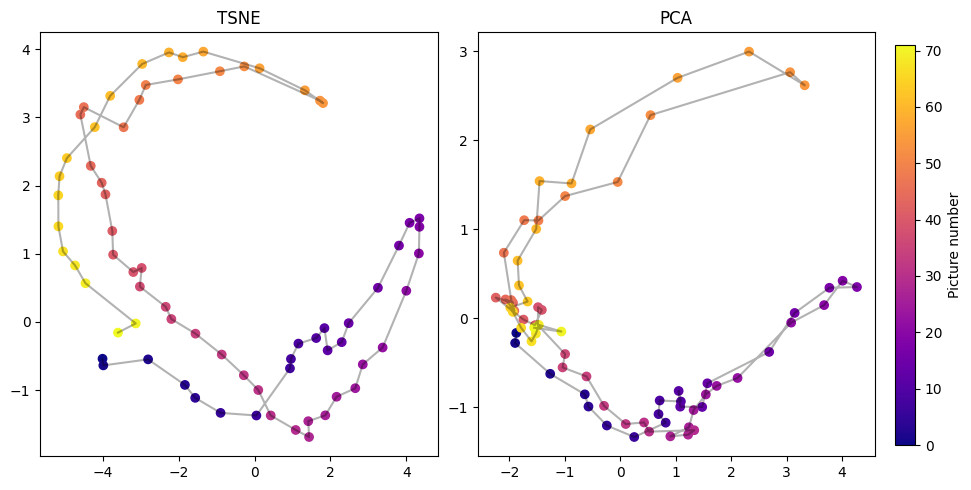

In [ ]:
for i in tqdm(range(20)):
    features = np.array([])
    for j in tqdm(range(72)):
        image = preprocess(coil20[i][j]).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
        features = np.append(features, image_features.cpu().numpy())
    
    features = features.reshape(-1, 512)
    img_tsne = TSNE(n_components=2).fit_transform(features)
    img_pca = PCA(n_components=2).fit_transform(features)

    cmap = plt.colormaps["plasma"]
    norm = Normalize(vmin=0, vmax=71)

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot t-SNE
    ax1.plot(img_tsne[:, 0], img_tsne[:, 1], 'k-', alpha=0.3)
    scatter1 = ax1.scatter(img_tsne[:, 0], img_tsne[:, 1], c=np.arange(72), cmap=cmap)
    ax1.set_title('TSNE')

    # Plot PCA
    ax2.plot(img_pca[:, 0], img_pca[:, 1], 'k-', alpha=0.3)
    scatter2 = ax2.scatter(img_pca[:, 0], img_pca[:, 1], c=np.arange(72), cmap=cmap)
    ax2.set_title('PCA')

    # Adjust layout to make room for colorbar
    plt.tight_layout()
    fig.subplots_adjust(right=0.88)  # Make room for colorbar on right

    # Add colorbar on the right side with custom width
    cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, label="Picture number")

    plt.show()

